**KELOMPOK 6 METODOLOGI PENELITIAN**


*   Richard Steven Immanuel Sihombing
*   Rizki Agung Ramadhan
*   Wahyu Ardiantito S





In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.drop('id', axis = 1, inplace = True)

# Preprocessing

In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'label']

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,label
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df['label'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: label, dtype: int64

In [ ]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

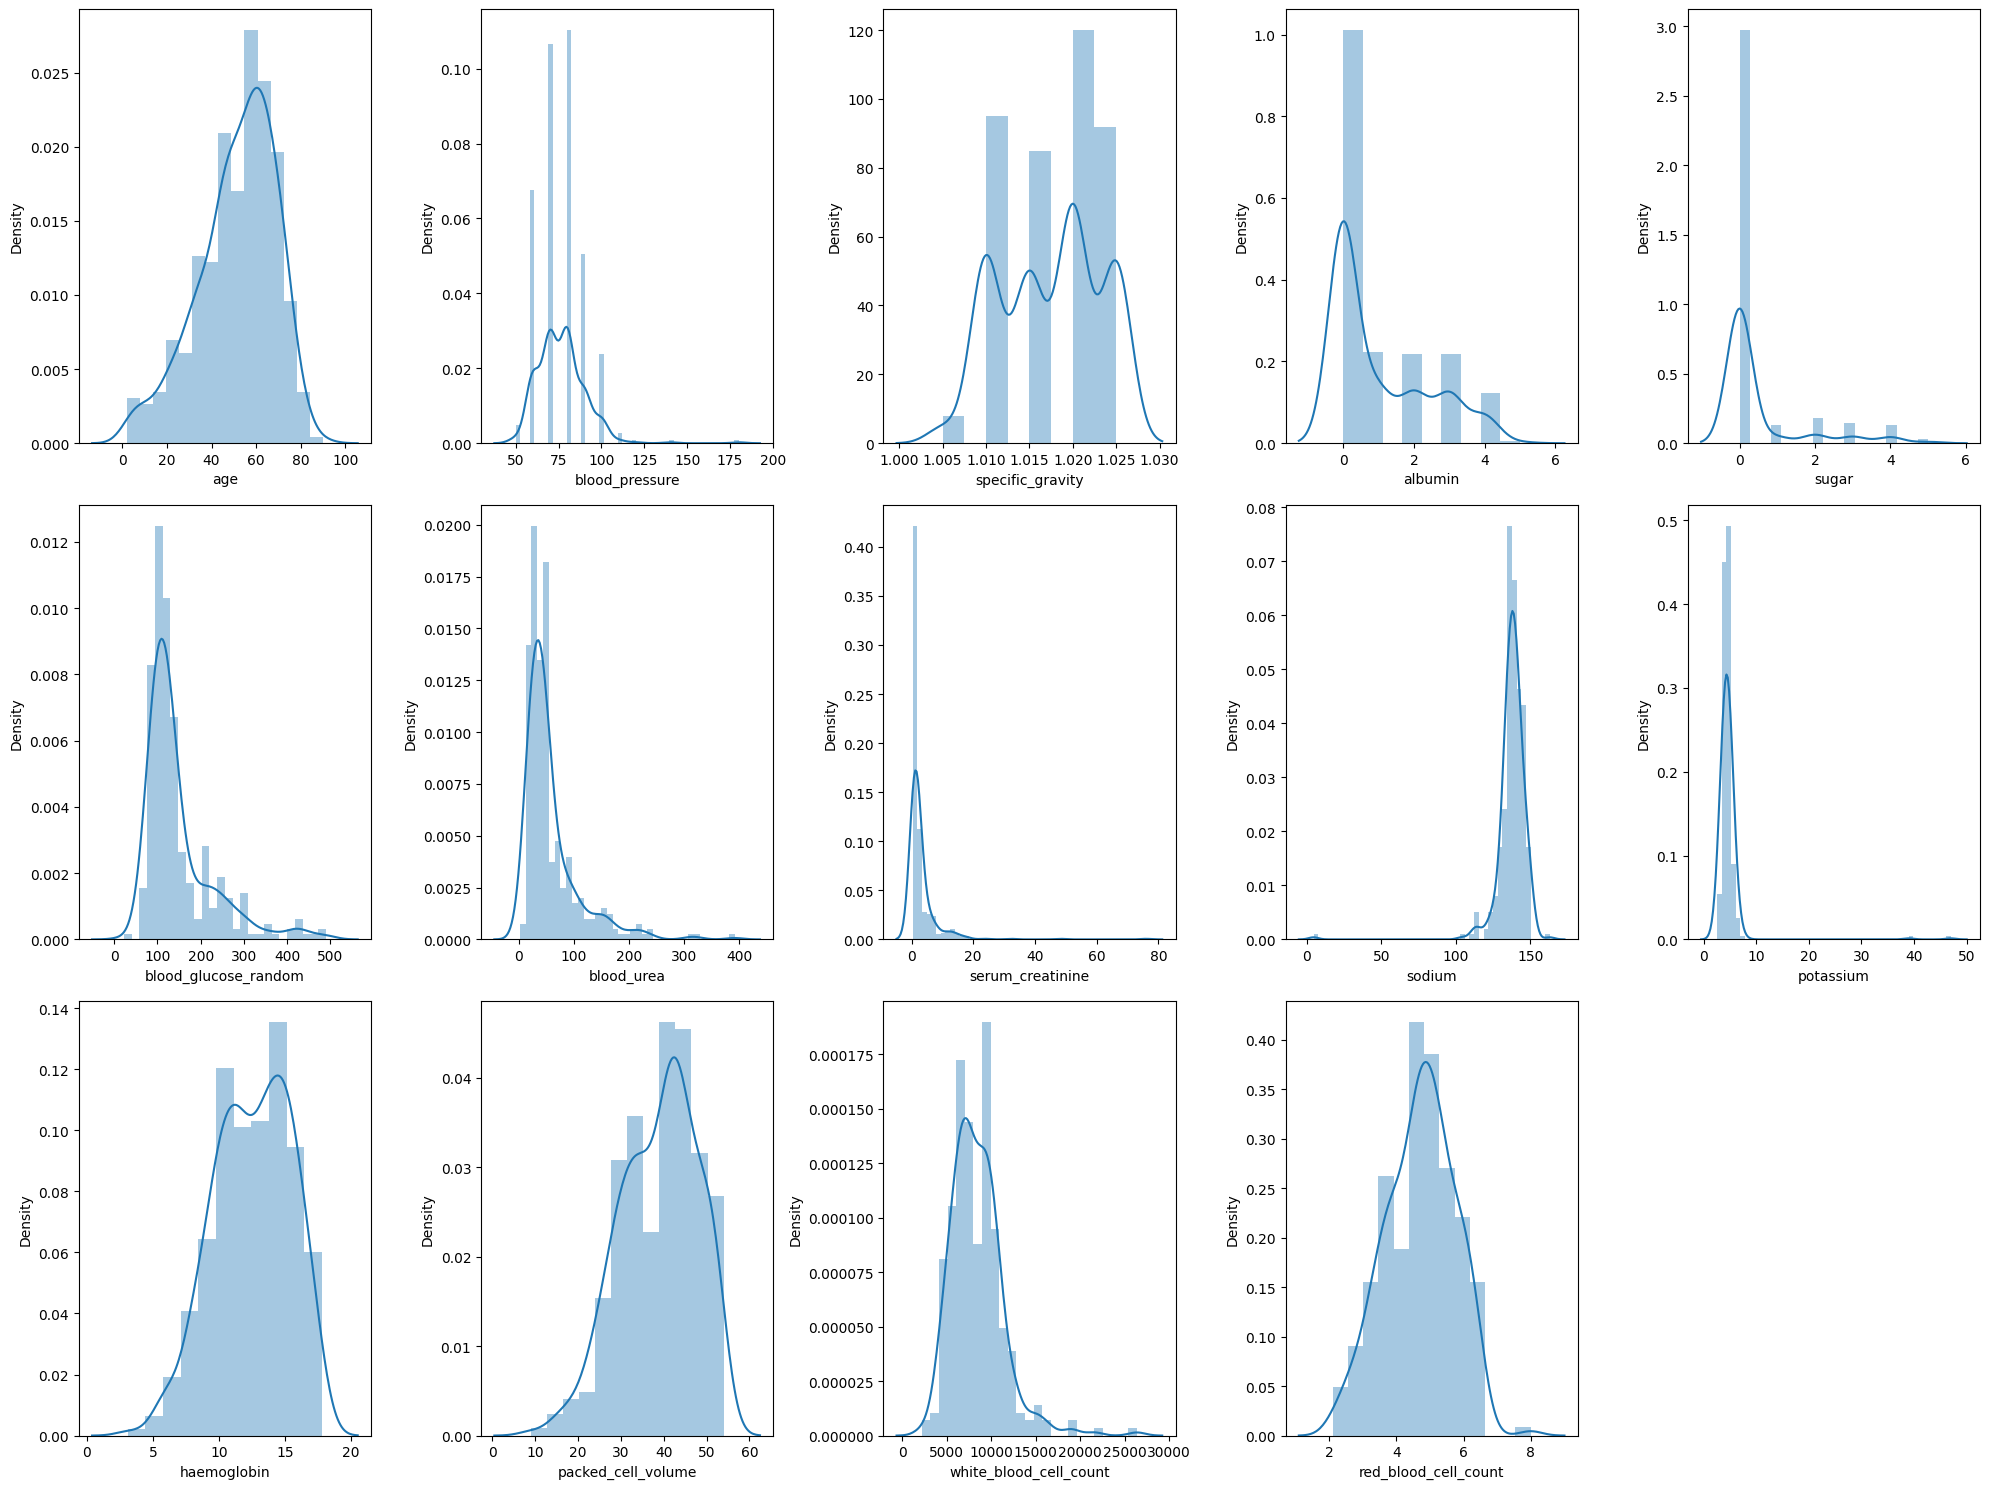

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

label has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['label'] = df['label'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['label'] = df['label'].map({'ckd': 0, 'not ckd': 1})
df['label'] = pd.to_numeric(df['label'], errors='coerce')

In [ ]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
label                        0
dtype: int64

In [ ]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [ ]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
label                        0
dtype: int64

In [ ]:
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    impute_mode(col)
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
label                      0
dtype: int64

In [ ]:
ind_col = [col for col in df.columns if col != 'label']
dep_col = 'label'

X = df[ind_col]
y = df[dep_col]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,label
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
ind_col = [col for col in df.columns if col != 'label']
dep_col = 'label'

X = df[ind_col]
y = df[dep_col]

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scaled_data = scale.fit_transform(X)

In [ ]:
print(X)

      age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                1   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

     pus_cell  pus_cell_clumps  bacteri

In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0)

# Building Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7928571428571428
Test Accuracy of KNN is 0.725 

Confusion Matrix :- 
[[46 26]
 [ 7 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.64      0.74        72
           1       0.61      0.85      0.71        48

    accuracy                           0.73       120
   macro avg       0.74      0.75      0.72       120
weighted avg       0.77      0.72      0.73       120



In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of svm

svm_acc = accuracy_score(y_test, svm.predict(X_test))

print(f"Training Accuracy of SVM is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Test Accuracy of SVM is {svm_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, svm.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, svm.predict(X_test))}")

Training Accuracy of SVM is 0.6428571428571429
Test Accuracy of SVM is 0.6 

Confusion Matrix :- 
[[62 10]
 [38 10]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.62      0.86      0.72        72
           1       0.50      0.21      0.29        48

    accuracy                           0.60       120
   macro avg       0.56      0.53      0.51       120
weighted avg       0.57      0.60      0.55       120



In [ ]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression()
logres.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of logistic regression

logres_acc = accuracy_score(y_test, logres.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, logres.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {logres_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, logres.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, logres.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.8964285714285715
Test Accuracy of Logistic Regression is 0.9 

Confusion Matrix :- 
[[68  4]
 [ 8 40]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        72
           1       0.91      0.83      0.87        48

    accuracy                           0.90       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'SVM', 'Logistic Regression'],
    'Score' : [knn_acc, svm_acc, logres_acc,]})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Logistic Regression,0.900
0,KNN,0.725
1,SVM,0.600


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly',
       title = 'Models Comparison')

# Model With SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

0    250
1    250
Name: label, dtype: int64

In [ ]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.30, random_state =0)

In [ ]:
knn.fit(X_train1, y_train1)

knn_acc = accuracy_score(y_test1, knn.predict(X_test1))

print(f"Training Accuracy of KNN is {accuracy_score(y_train1, knn.predict(X_train1))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test1, knn.predict(X_test1))}\n")
print(f"Classification Report :- \n {classification_report(y_test1, knn.predict(X_test1))}")

Training Accuracy of KNN is 0.8171428571428572
Test Accuracy of KNN is 0.78 

Confusion Matrix :- 
[[42 32]
 [ 1 75]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.57      0.72        74
           1       0.70      0.99      0.82        76

    accuracy                           0.78       150
   macro avg       0.84      0.78      0.77       150
weighted avg       0.84      0.78      0.77       150



In [ ]:
svm.fit(X_train1, y_train1)

svm_acc = accuracy_score(y_test1, svm.predict(X_test1))

print(f"Training Accuracy of KNN is {accuracy_score(y_train1, svm.predict(X_train1))}")
print(f"Test Accuracy of KNN is {svm_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test1, svm.predict(X_test1))}\n")
print(f"Classification Report :- \n {classification_report(y_test1, svm.predict(X_test1))}")

Training Accuracy of KNN is 0.6657142857142857
Test Accuracy of KNN is 0.6466666666666666 

Confusion Matrix :- 
[[50 24]
 [29 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.63      0.68      0.65        74
           1       0.66      0.62      0.64        76

    accuracy                           0.65       150
   macro avg       0.65      0.65      0.65       150
weighted avg       0.65      0.65      0.65       150



In [ ]:
logres.fit(X_train1, y_train1)

logres_acc = accuracy_score(y_test1, logres.predict(X_test1))

print(f"Training Accuracy of KNN is {accuracy_score(y_train1, logres.predict(X_train1))}")
print(f"Test Accuracy of KNN is {logres_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test1, logres.predict(X_test1))}\n")
print(f"Classification Report :- \n {classification_report(y_test1, logres.predict(X_test1))}")

Training Accuracy of KNN is 0.9257142857142857
Test Accuracy of KNN is 0.88 

Confusion Matrix :- 
[[65  9]
 [ 9 67]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        74
           1       0.88      0.88      0.88        76

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'SVM', 'Logistic Regression'],
    'Score' : [knn_acc, svm_acc, logres_acc,]})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Logistic Regression,0.880000
0,KNN,0.780000
1,SVM,0.646667


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly',
       title = 'Models Comparison')